<a href="https://colab.research.google.com/github/ilirsheraj/AutoEncoders-GANs/blob/main/Chpt_01_Basics_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Coding a Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [10]:
Y = np.array([0,1,1,0])
print(X.shape)
print(Y.shape)

(4, 2)
(4,)


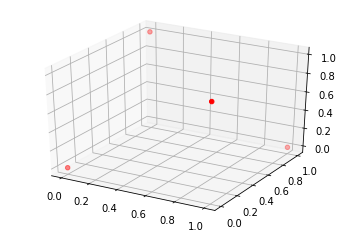

In [13]:
# Plot the whole thing
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], Y, X[:,1], c='r', marker='o')
plt.show()

In [14]:
# Initializ e the weights
no_of_inputs = X.shape[1]
weights = np.random.rand(no_of_inputs + 1)
print(weights)
print()
print(weights.shape)

[0.86151798 0.4915999  0.28346164]

(3,)


In [15]:
no_of_inputs

2